# Cime Statistics for Fayette County

The objective of this study is to determine:

- Crime trends for Fayette County and if there are any patterns
- Whether or not it is appropriate to hire a second Assistant State's Attorney due to crime statistics
- If statistics support another assistant, show justification for this action

The data for this study is taken from the Illinois Criminal Justice Authority and is publicly available from their website at https://icjia.illinois.gov/researchhub/datasets. These datasets were downloaded in April 2021.

Update:
These datasets have been updated since this study. Please refer to the website for up-to-date information.

In [71]:
# importing pandas as data
import pandas as pd
import numpy as np
crime = pd.read_csv('2017_criminal_filings.csv')

In [72]:
# checking data
crime.head()

,year,id,fips_number,county_name,judicial_circuit,region,community_type,percent_rural,population,dui,felony,misdemeanor,dui_rate,felony_rate,misdemeanor_rate
0,1978,1,1.0,Adams,8,Central,Mostly Urban,32.6,71600,NaN,214.0,356.0,NaN,298.9,497.2
1,1978,2,3.0,Alexander,1,Southern,Mostly Rural,61.9,12200,NaN,100.0,308.0,NaN,819.7,2524.6
2,1978,3,5.0,Bond,3,Southern,Mostly Rural,60.7,15700,NaN,48.0,165.0,NaN,305.7,1051.0
3,1978,4,7.0,Boone,17,Northern - Other,Mostly Urban,19.4,28700,NaN,82.0,472.0,NaN,285.7,1644.6
4,1978,5,9.0,Brown,8,Central,Mostly Urban,41.1,5400,NaN,38.0,59.0,NaN,703.7,1092.6


In [73]:
# printing information about the data
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 15 columns):
year                4080 non-null int64
id                  4080 non-null int64
fips_number         4080 non-null float64
county_name         4080 non-null object
judicial_circuit    4080 non-null object
region              4080 non-null object
community_type      4080 non-null object
percent_rural       4080 non-null float64
population          4080 non-null int64
dui                 408 non-null float64
felony              4080 non-null float64
misdemeanor         4080 non-null float64
dui_rate            408 non-null float64
felony_rate         4080 non-null float64
misdemeanor_rate    4080 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 478.2+ KB


In [74]:
# checking for nulls
crime.isnull().sum()

year                   0
id                     0
fips_number            0
county_name            0
judicial_circuit       0
region                 0
community_type         0
percent_rural          0
population             0
dui                 3672
felony                 0
misdemeanor            0
dui_rate            3672
felony_rate            0
misdemeanor_rate       0
dtype: int64

In [75]:
#investigating nulls
crime_null = crime[crime.isnull().any(axis=1)]
crime_null

,year,id,fips_number,county_name,judicial_circuit,region,community_type,percent_rural,population,dui,felony,misdemeanor,dui_rate,felony_rate,misdemeanor_rate
0,1978,1,1.0,Adams,8,Central,Mostly Urban,32.6,71600,NaN,214.0,356.0,NaN,298.9,497.2
1,1978,2,3.0,Alexander,1,Southern,Mostly Rural,61.9,12200,NaN,100.0,308.0,NaN,819.7,2524.6
2,1978,3,5.0,Bond,3,Southern,Mostly Rural,60.7,15700,NaN,48.0,165.0,NaN,305.7,1051.0
3,1978,4,7.0,Boone,17,Northern - Other,Mostly Urban,19.4,28700,NaN,82.0,472.0,NaN,285.7,1644.6
4,1978,5,9.0,Brown,8,Central,Mostly Urban,41.1,5400,NaN,38.0,59.0,NaN,703.7,1092.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,2013,98,195.0,Whiteside,14,Northern - Other,Mostly Urban,37.3,57462,NaN,385.0,411.0,NaN,670.0,715.3
3668,2013,99,197.0,Will,12,Northern - Collar,Mostly Urban,3.9,683873,NaN,2743.0,3324.0,NaN,401.1,486.1
3669,2013,100,199.0,Williamson,1,Southern,Mostly Urban,34.8,67447,NaN,593.0,840.0,NaN,879.2,1245.4
3670,2013,101,201.0,Winnebago,17,Northern - Other,Mostly Urban,7.9,290994,NaN,3462.0,4292.0,NaN,1189.7,1474.9


Even though the counties reporting nulls are rural or completely rural and we would expect lower crime numbers, there are no entries at all for these years. It is unlikely for a county to have no violent crime. We will drop these rows as it appears that these counties did not report to the database.

In [76]:
crime.loc[crime['county_name']=='Fayette']

,year,id,fips_number,county_name,judicial_circuit,region,community_type,percent_rural,population,dui,felony,misdemeanor,dui_rate,felony_rate,misdemeanor_rate
25,1978,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22000,NaN,88.0,167.0,NaN,400.0,759.1
127,1979,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22000,NaN,79.0,223.0,NaN,359.1,1013.6
229,1980,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22167,NaN,83.0,229.0,NaN,374.4,1033.1
331,1981,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22444,NaN,60.0,220.0,NaN,267.3,980.2
433,1982,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22282,NaN,98.0,282.0,NaN,439.8,1265.6
535,1983,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22397,NaN,61.0,200.0,NaN,272.4,893.0
637,1984,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,22058,NaN,66.0,230.0,NaN,299.2,1042.7
739,1985,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,21788,NaN,80.0,241.0,NaN,367.2,1106.1
841,1986,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,21665,NaN,92.0,289.0,NaN,424.6,1333.9
943,1987,26,51.0,Fayette,4,Southern,Mostly Rural,67.0,21440,NaN,75.0,259.0,NaN,349.8,1208.0


In [77]:
#finding basic statistics
crime.describe()

,year,id,fips_number,percent_rural,population,dui,felony,misdemeanor,dui_rate,felony_rate,misdemeanor_rate
count,4080.000000,4080.000000,4080.000000,4080.000000,4.080000e+03,408.000000,4080.000000,4080.000000,408.000000,4080.000000,4080.000000
mean,1997.500000,51.500000,102.000000,51.091176,1.190848e+05,379.585784,710.948039,3757.538725,374.951225,653.592868,1551.688015
std,11.544811,29.447058,58.894115,27.843037,5.258306e+05,1140.031381,3217.415901,29165.172833,176.427547,341.475712,796.131530
min,1978.000000,1.000000,1.000000,0.000000,3.935000e+03,5.000000,1.000000,17.000000,100.400000,16.400000,206.900000
25%,1987.750000,26.000000,51.000000,31.300000,1.496725e+04,47.000000,78.000000,183.000000,261.925000,397.775000,1024.850000
50%,1997.500000,51.500000,102.000000,50.400000,2.659100e+04,84.500000,153.000000,367.500000,347.750000,585.400000,1412.700000
75%,2007.250000,77.000000,153.000000,69.900000,5.390275e+04,211.250000,380.250000,899.250000,447.800000,829.725000,1884.825000
max,2017.000000,102.000000,203.000000,100.000000,5.376861e+06,11143.000000,47880.000000,508219.000000,2100.900000,3196.100000,9735.400000


To ensure that the figures are comparable, we will examine the rate columns, which show rates per 100,000 of population.

## Fayette County

First, we will visually examine Fayette County alone to identify any clear patterns.

In [78]:
fayette = crime.loc[crime['county_name']=='Fayette']

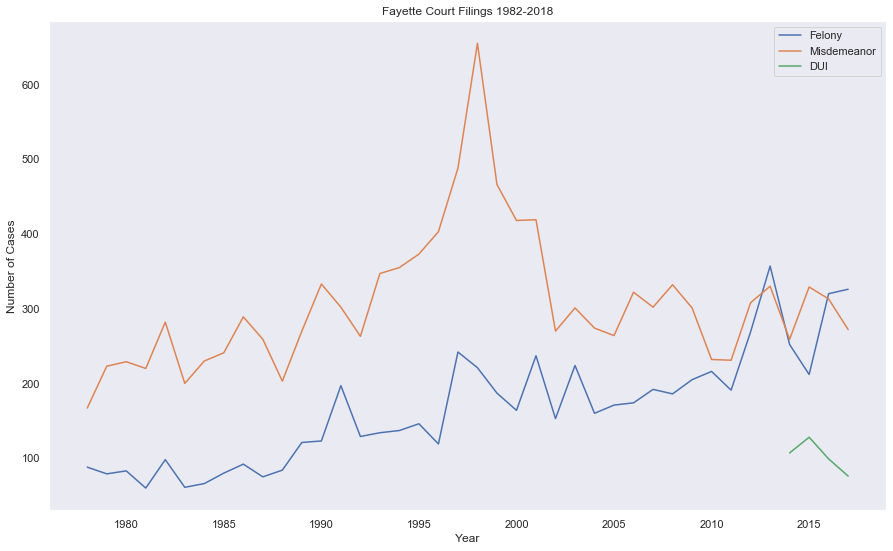

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

cols = fayette[['felony', 'misdemeanor', 'dui']]
plt.figure(figsize = (15,9))
plt.plot(fayette['year'], cols)
plt.legend(['Felony', 'Misdemeanor', 'DUI'])
plt.title('Fayette Court Filings 1982-2018')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid()
plt.show()

There is a large one-year increase in misdemeanor filings in 1998. The cause of this increase is unknown, however, I confirmed, through the court information system, that there were 655 misdemeanor case numbers in that year. 

Let's limit the graph to the year 2000 and after and take a look.

In [80]:
fayette_recent = crime.loc[crime['county_name']=='Fayette']
fayette_recent = fayette_recent.loc[fayette_recent['year'] >= 2000]

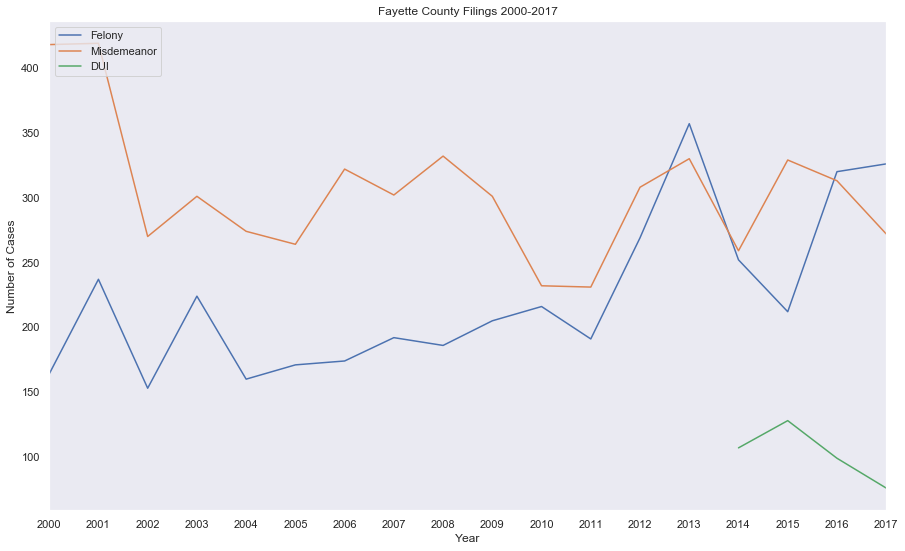

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

cols = fayette_recent[['felony', 'misdemeanor', 'dui']]
plt.figure(figsize = (15,9))
plt.plot(fayette_recent['year'], cols)
plt.legend(['Felony', 'Misdemeanor', 'DUI'], loc = 'upper left')
plt.title('Fayette County Filings 2000-2017')
plt.xticks(fayette_recent['year'])
plt.xlabel('Year')
plt.xlim(2000,2017)
plt.ylabel('Number of Cases')
plt.grid()

plt.show()

The number of misdeamenor cases is typically above the number of felonies, however, in three years, two years, that was reversed. Prior to 2014, DUIs were included in the felony or misdemeanor counts, as appropriate; however, in 2014, they were pulled out into their own category. This change might account for some of the behavior in 2014-2017, but it does not account for the reversal in trends in 2013. 

This is an opportunity for further exploration.

## Fayette County in Comparison

Let's examine how Fayette County compares to other entities. We'll begin with their judicial district. Are there any patterns there that should be explored? Let's compare the hard number of felonies from each.

In [82]:
jud_4_sum = crime[crime['judicial_circuit'] == '4']
jud_4_sum = jud_4_sum.groupby('year', as_index=False).sum() 

jud_4_sum = jud_4_sum.rename(columns = {'felony': 'jud4_felony'})
jud_fel = jud_4_sum['jud4_felony']
jud_4_sum

,year,id,fips_number,percent_rural,population,dui,jud4_felony,misdemeanor,dui_rate,felony_rate,misdemeanor_rate
0,1978,345,681.0,518.0,245500,0.0,765.0,2804.0,0.0,2801.3,9720.9
1,1979,345,681.0,518.0,247200,0.0,862.0,2890.0,0.0,3129.2,9954.7
2,1980,345,681.0,518.0,247907,0.0,965.0,2626.0,0.0,3472.4,9390.8
3,1981,345,681.0,518.0,252879,0.0,840.0,2711.0,0.0,3091.3,9775.7
4,1982,345,681.0,518.0,251161,0.0,801.0,2701.0,0.0,3011.5,10242.5
5,1983,345,681.0,518.0,251342,0.0,722.0,2746.0,0.0,2638.1,10111.2
6,1984,345,681.0,518.0,249594,0.0,761.0,2728.0,0.0,2706.4,10400.0
7,1985,345,681.0,518.0,247655,0.0,827.0,2826.0,0.0,3086.6,10391.3
8,1986,345,681.0,518.0,245960,0.0,848.0,3071.0,0.0,3172.2,11137.5
9,1987,345,681.0,518.0,244202,0.0,842.0,3217.0,0.0,2929.7,11514.7


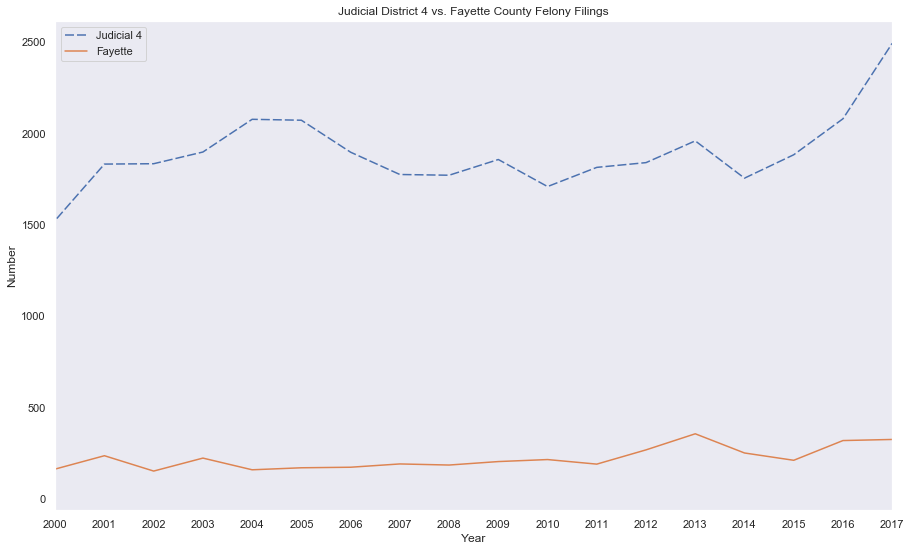

In [83]:
fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(jud_4_sum['year'], jud_4_sum['jud4_felony'], dashes = [6,2])
ax2 = ax.plot(fayette['year'], fayette['felony'])
ax.legend(['Judicial 4', 'Fayette',], loc = 'upper left')
ax.set_title('Judicial District 4 vs. Fayette County Felony Filings')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_xticks(jud_4_sum['year'])
ax.set_xlim(2000, 2017)
plt.grid()
plt.show()


Fayette County makes up a relatively small number of cases in Judicial District 4. It is worth noting that Fayette County does not appear to be driving trends within the larger District, probably due to their relatively small number of cases. This is expected, since Fayette is a relatively small County. Does it make a difference if we look at the rate of felonies per 100,000 of population instead of the hard numbers?

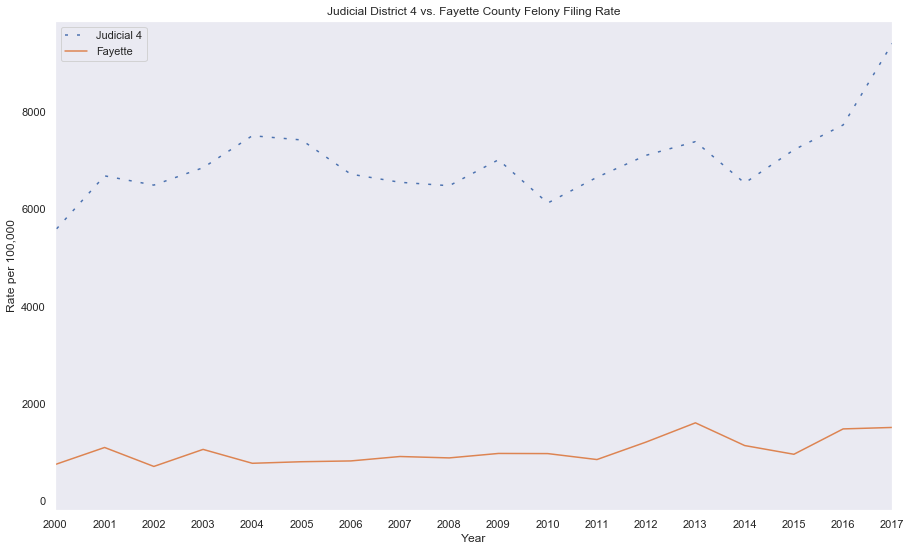

In [84]:
fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(jud_4_sum['year'], jud_4_sum['felony_rate'], dashes = [2,6])
ax2 = ax.plot(fayette['year'], fayette['felony_rate'])
ax.legend(['Judicial 4', 'Fayette',], loc = 'upper left')
ax.set_title('Judicial District 4 vs. Fayette County Felony Filing Rate')
ax.set_xlabel('Year')
ax.set_ylabel('Rate per 100,000')
ax.set_xticks(jud_4_sum['year'])
ax.set_xlim(2000, 2017)
plt.grid()
plt.show()

There are no large, obvious differences between hard numbers and rate of felony filing. Let's examine midemeanor filings.

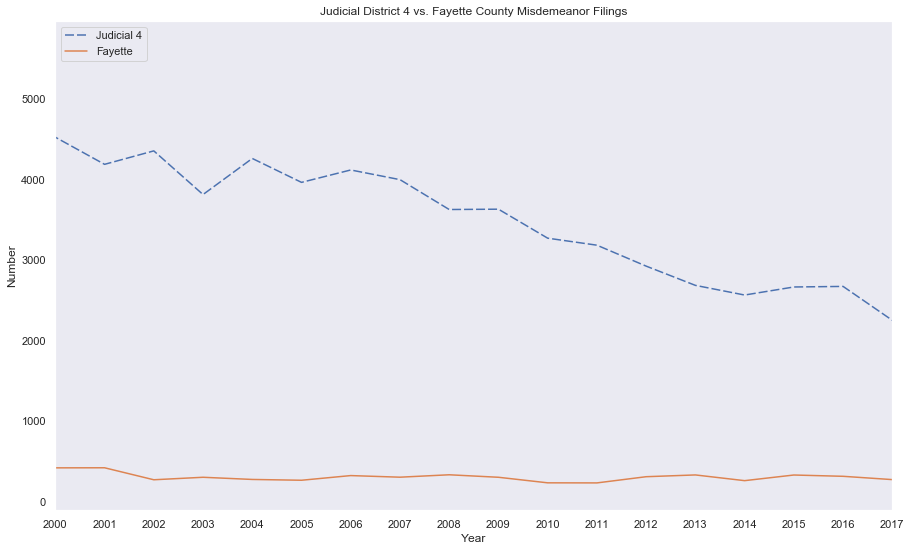

In [85]:
fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(jud_4_sum['year'], jud_4_sum['misdemeanor'], dashes = [6,2])
ax2 = ax.plot(fayette['year'], fayette['misdemeanor'])
ax.legend(['Judicial 4', 'Fayette'], loc = 'upper left')
ax.set_title('Judicial District 4 vs. Fayette County Misdemeanor Filings')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_xticks(jud_4_sum['year'])
ax.set_xlim(2000, 2017)
plt.grid()
plt.show()

The hard numbers of misdemeanor cases have fallen overall in Judicial District 4, but have stayed fairly steady in Fayette County. This might be another opportunity for exploration.

Let's examine Fayette County's filing rates compared to the State, Judicial District 4, Mostly Rural, and (for fun, as a large amount of Fayette County is rural) rural rates.

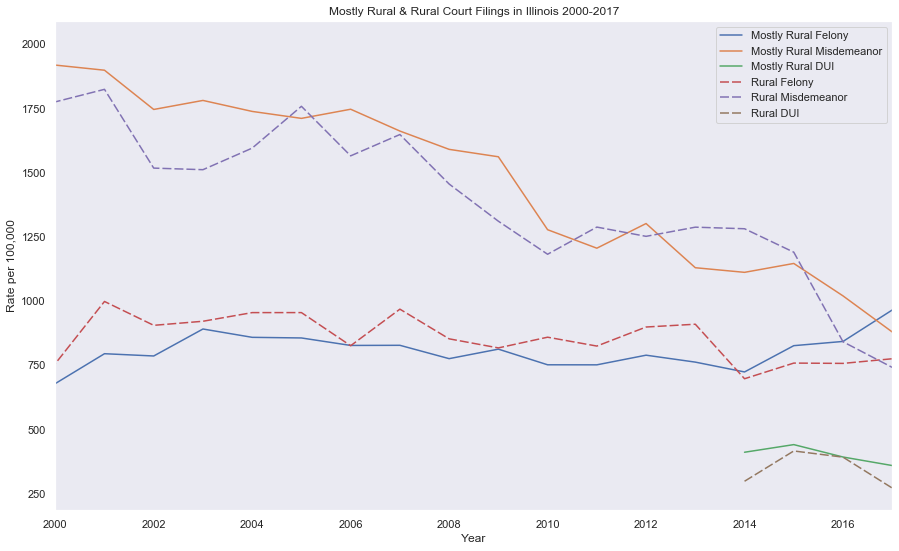

In [86]:
fig, ax = plt.subplots(figsize = (15,9))
cols = ['felony_rate', 'misdemeanor_rate', 'dui_rate']
ax1 = ax.plot(mostly_rural['year'], mostly_rural[cols])
ax2 = ax.plot(rural['year'], rural[cols], dashes = [6,2])
ax.legend(['Mostly Rural Felony', 'Mostly Rural Misdemeanor', 'Mostly Rural DUI', 'Rural Felony', 'Rural Misdemeanor', 'Rural DUI'])
ax.set_xlabel('Year')
ax.set_ylabel('Rate per 100,000')
plt.grid()
plt.xlim(2000,2017)
ax.set_title('Mostly Rural & Rural Court Filings in Illinois 2000-2017')
plt.show()

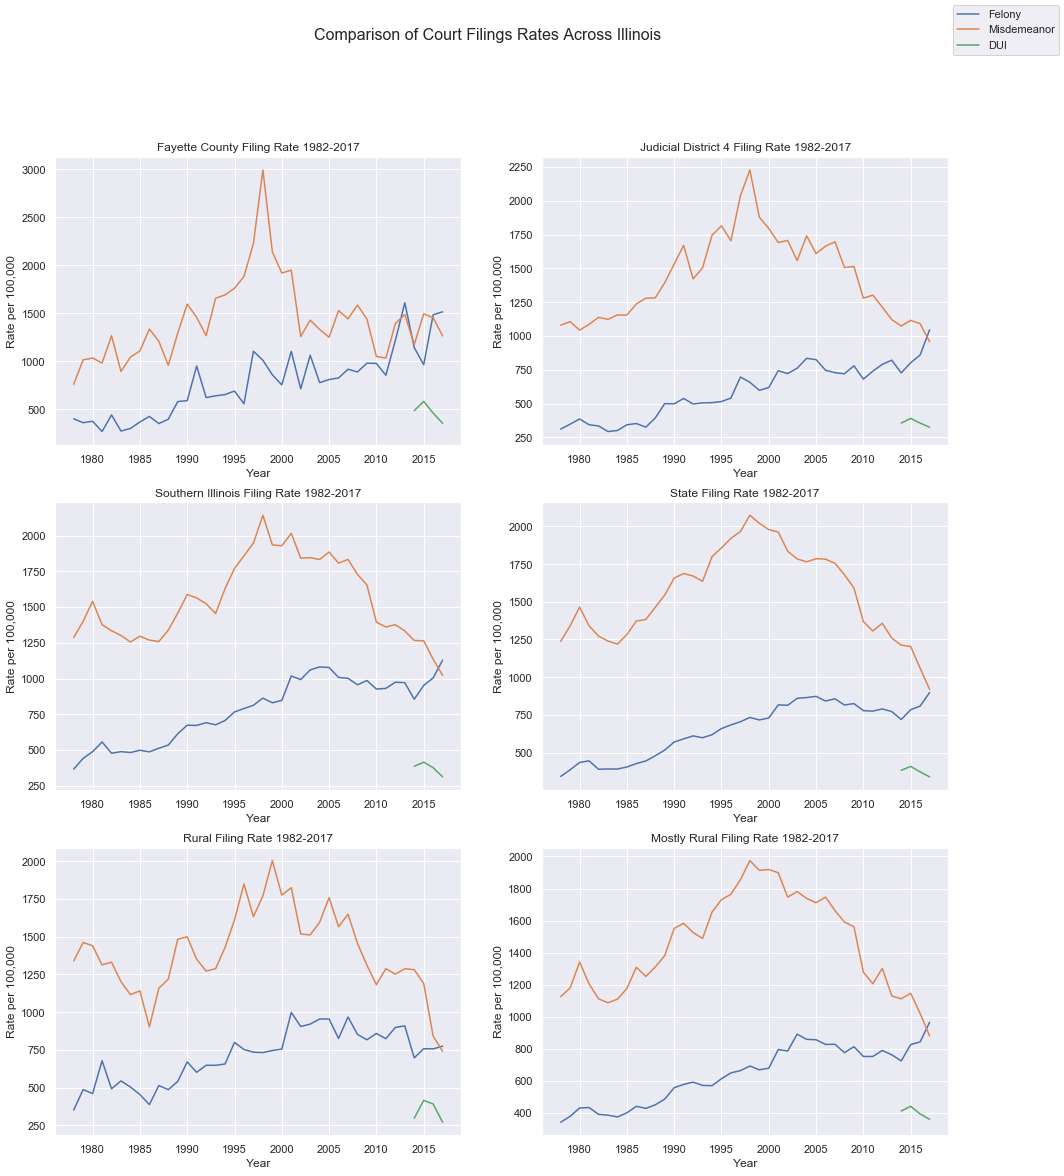

In [87]:
state = crime.groupby('year', as_index=False).mean()
mostly_rural = crime.loc[crime['community_type'] == 'Mostly Rural']
mostly_rural = mostly_rural.groupby(mostly_rural['year'], as_index=False).mean()
rural = crime.loc[crime['community_type'] == 'Completely Rural']
rural = rural.groupby(rural['year'], as_index=False).mean()
southern = crime.loc[crime['region']=='Southern']
southern = southern.groupby('year', as_index=False).mean()


fig = plt.figure(figsize = (16,18))
fig.suptitle('Comparison of Court Filings Rates Across Illinois', fontsize=16)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

cols = fayette[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax1.plot(fayette['year'], cols)
ax1.set_title('Fayette County Filing Rate 1982-2017')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rate per 100,000')


cols = jud_4[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax2.plot(jud_4['year'], cols)
ax2.set_title('Judicial District 4 Filing Rate 1982-2017')
ax2.set_xlabel('Year')
ax2.set_ylabel('Rate per 100,000')


cols = southern[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax3.plot(southern['year'], cols)
ax3.set_title('Southern Illinois Filing Rate 1982-2017')
ax3.set_xlabel('Year')
ax3.set_ylabel('Rate per 100,000')


cols = state[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax4.plot(state['year'], cols)
ax4.set_title('State Filing Rate 1982-2017')
ax4.set_xlabel('Year')
ax4.set_ylabel('Rate per 100,000')

cols = rural[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax5.plot(rural['year'], cols)
ax5.set_title('Rural Filing Rate 1982-2017')
ax5.set_xlabel('Year')
ax5.set_ylabel('Rate per 100,000')

cols = mostly_rural[['felony_rate', 'misdemeanor_rate', 'dui_rate']]
ax6.plot(mostly_rural['year'], cols)
ax6.set_title('Mostly Rural Filing Rate 1982-2017')
ax6.set_xlabel('Year')
ax6.set_ylabel('Rate per 100,000')

fig.legend(['Felony', 'Misdemeanor', 'DUI'], loc = 'upper right')
plt.show()

As the trending down of the number of misdemeanor filings and trending up of felony filings seems to be universal across groupings, we can conclude that this is a trend that is happening throughout the state in varying degrees. We may want to examine statutes to see if there might be a statutory issue that has caused former misdemeanors to be classified as felonies. 

These comparisons are interesting, but because there are both significantly larger and smaller counties in District 4, this does not help us to determine how Fayette County compares to similarly situated counties within the Judicial District. Fayette is often compared by residents to Christian, Shelby, and Montgomery counties. We will now examing how Fayette County compares with them.

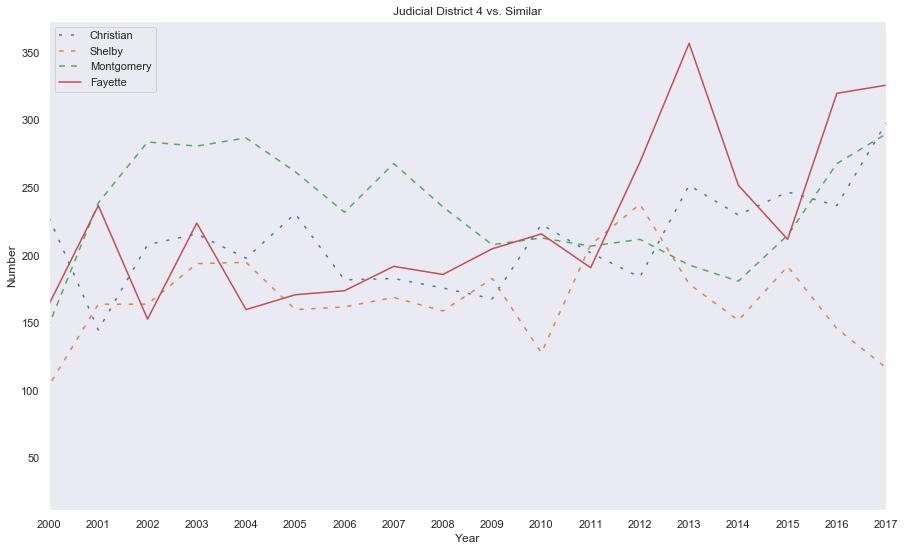

In [88]:
christian = crime.loc[crime['county_name']=='Christian']
shelby = crime.loc[crime['county_name']=='Shelby']
montgomery = crime.loc[crime['county_name']=='Montgomery']
fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(christian['year'], christian['felony'], dashes = [2,6])
ax2 = ax.plot(shelby['year'], shelby['felony'], dashes = [3,5])
ax3 = ax.plot(montgomery['year'], montgomery['felony'], dashes = [4,4])
ax4 = ax.plot(fayette['year'], fayette['felony'])
ax.legend(['Christian', 'Shelby', 'Montgomery', 'Fayette'], loc = 'upper left')
ax.set_title('Judicial District 4 vs. Similar')
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_xticks(jud_4_sum['year'])
ax.set_xlim(2000, 2017)
plt.grid()
plt.show()

Since 2012, Fayette County has led the similar counties in felony filings in all but one year. This would mean that they have a higher case load that similar counties. We will need to examine staffing levels in similar counties.

This helps, but to gain a little perspective, but let's examine Fayette County against some other counties in the judicial district.

In [89]:
fayette_recent = crime.loc[crime['county_name']=='Fayette']
fayette_recent = fayette_recent.loc[fayette_recent['year'] >= 2010]
bond = crime.loc[crime['county_name']=='Bond']
bond = bond.loc[bond['year'] >= 2010]
eff = crime.loc[crime['county_name']=='Effingham']
eff = eff.loc[eff['year'] >= 2010]
mont = crime.loc[crime['county_name']=='Montgomery']
mont = mont.loc[mont['year'] >= 2010]
shelby = crime.loc[crime['county_name']=='Shelby']
shelby = shelby.loc[shelby['year'] >= 2010]
marion = crime.loc[crime['county_name']=='Marion']
marion = marion.loc[marion['year'] >= 2010]
christian = crime.loc[crime['county_name']=='Christian']
christian = christian.loc[christian['year'] >= 2010]
clinton = crime.loc[crime['county_name']=='Clinton']
clinton = clinton.loc[clinton['year'] >= 2010]
jasper = crime.loc[crime['county_name']=='Jasper']
jasper = jasper.loc[jasper['year'] >= 2010]
clay = crime.loc[crime['county_name']=='Clay']
clay = clay.loc[clay['year'] >= 2010]

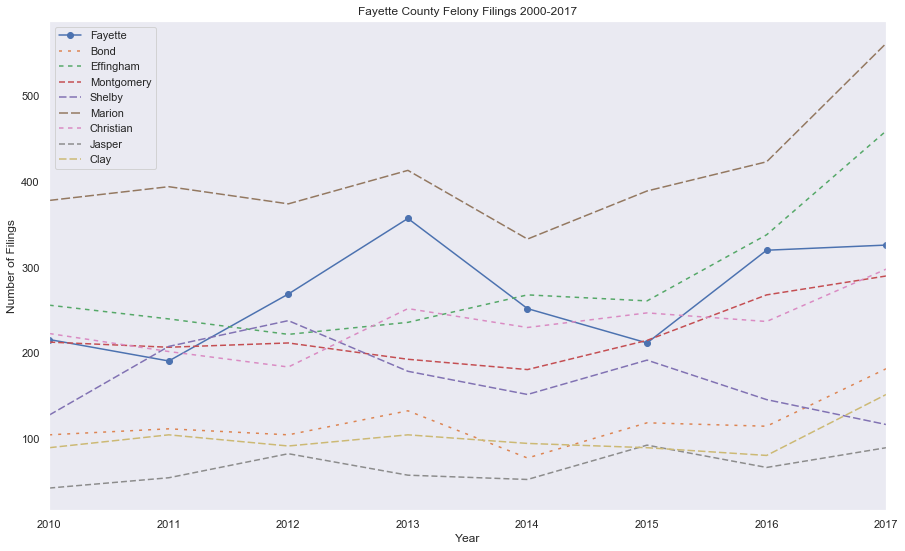

In [90]:
plt.figure(figsize = (15,9))
plt.plot(fayette_recent['year'], fayette_recent['felony'], '-o')
plt.plot(bond['year'], bond['felony'], dashes = [2,4])
plt.plot(eff['year'], eff['felony'], dashes = [3,3])
plt.plot(mont['year'], mont['felony'], dashes = [4,2])
plt.plot(shelby['year'], shelby['felony'], dashes = [5,2])
plt.plot(marion['year'], marion['felony'], dashes = [6,2])
plt.plot(christian['year'], christian['felony'], dashes = [3,3])
plt.plot(jasper['year'], jasper['felony'], dashes = [4,2])
plt.plot(clay['year'], clay['felony'], dashes = [5,2])
plt.legend(['Fayette', 'Bond', 'Effingham', 'Montgomery', 'Shelby', 'Marion', 'Christian', 'Jasper', 'Clay'], loc = 'upper left')
plt.title('Fayette County Felony Filings 2000-2017')
plt.xticks(fayette_recent['year'])
plt.xlabel('Year')
plt.xlim(2010,2017)
plt.ylabel('Number of Filings')
plt.grid()

plt.show()

In [91]:
population = crime.loc[crime['year'] == 2017]
population = population[['county_name', 'population']]
counties = ['Bond', 'Effingham', 'Montgomery', 'Shelby', 'Marion', 'Christian', 'Clinton', 'Jasper', 'Clay', 'Fayette']
population = population[population['county_name'].isin(counties)]
population

,county_name,population
3980,Bond,16635
3988,Christian,33011
3990,Clay,13272
3991,Clinton,37607
4002,Effingham,34147
4003,Fayette,21535
4017,Jasper,9540
4038,Marion,37821
4045,Montgomery,28755
4064,Shelby,21752


Because Clay and Jasper Counties' population is so much lower, and to make the graphs a bit more readable, we will exclude them from further graphs.

Let's examine the felony filings for the selected counties again.

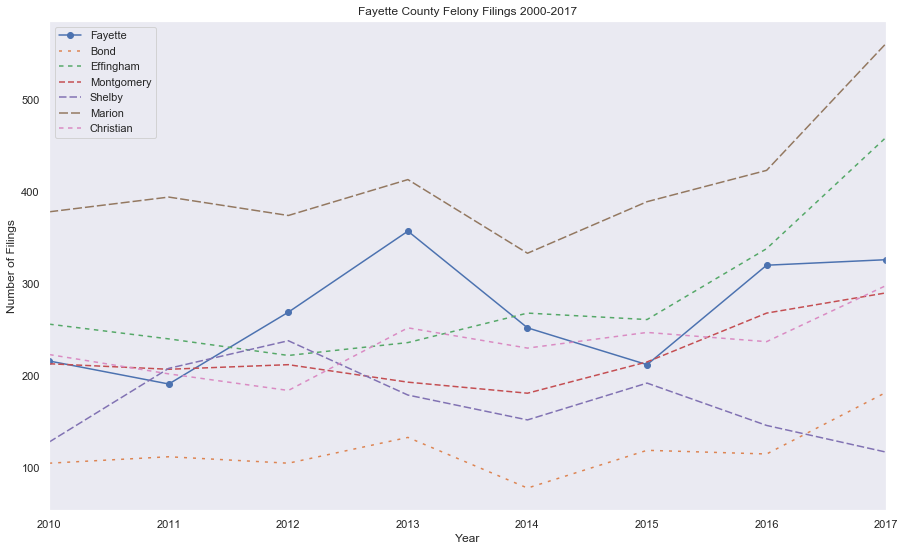

In [92]:
plt.figure(figsize = (15,9))
plt.plot(fayette_recent['year'], fayette_recent['felony'], '-o')
plt.plot(bond['year'], bond['felony'], dashes = [2,4])
plt.plot(eff['year'], eff['felony'], dashes = [3,3])
plt.plot(mont['year'], mont['felony'], dashes = [4,2])
plt.plot(shelby['year'], shelby['felony'], dashes = [5,2])
plt.plot(marion['year'], marion['felony'], dashes = [6,2])
plt.plot(christian['year'], christian['felony'], dashes = [3,3])
plt.legend(['Fayette', 'Bond', 'Effingham', 'Montgomery', 'Shelby', 'Marion', 'Christian'], loc = 'upper left')
plt.title('Fayette County Felony Filings 2000-2017')
plt.xticks(fayette_recent['year'])
plt.xlabel('Year')
plt.xlim(2010,2017)
plt.ylabel('Number of Filings')
plt.grid()

plt.show()

This graph shows that Fayette County has years of filings that rival Effingham County. The top county is Marion, which has a town known for drug and gang activity. Marion's population is 37,821 and Effingham's population is 34,147. In contrast, Fayette County has 21,535 residents. 

Let's examine misdemeanors.

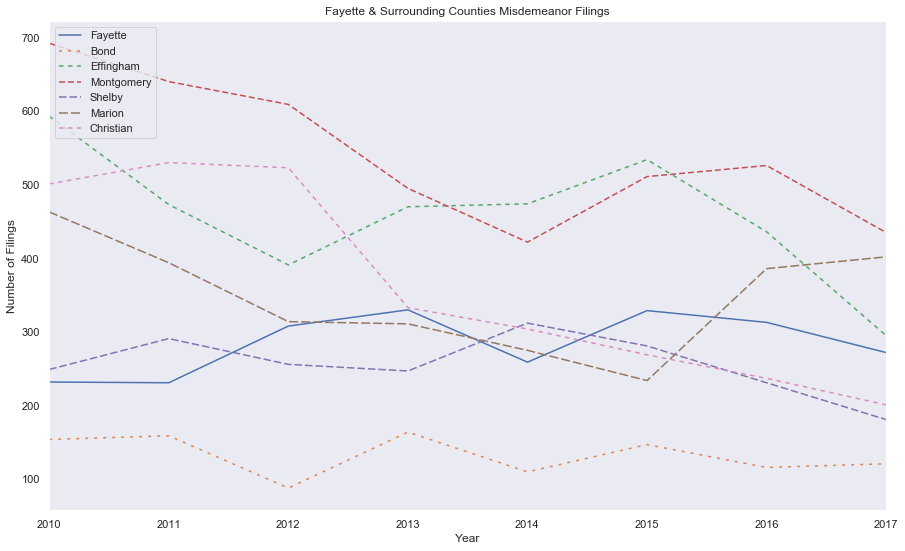

In [93]:
fig = plt.figure(figsize = (15,9))
plt.plot(fayette_recent['year'], fayette_recent['misdemeanor'])
plt.plot(bond['year'], bond['misdemeanor'], dashes = [2,4])
plt.plot(eff['year'], eff['misdemeanor'], dashes = [3,3])
plt.plot(mont['year'], mont['misdemeanor'], dashes = [4,2])
plt.plot(shelby['year'], shelby['misdemeanor'], dashes = [5,2])
plt.plot(marion['year'], marion['misdemeanor'], dashes = [6,2])
plt.plot(christian['year'], christian['misdemeanor'], dashes = [3,3])
plt.legend(['Fayette', 'Bond', 'Effingham', 'Montgomery', 'Shelby', 'Marion', 'Christian'], loc = 'upper left')
plt.title('Fayette & Surrounding Counties Misdemeanor Filings')
plt.xticks(fayette_recent['year'])
plt.xlabel('Year')
plt.xlim(2010,2017)
plt.ylabel('Number of Filings')
plt.grid()

plt.show()
fig.savefig('misdemeanorfiling2.png', bbox_inches='tight')

Fayette County's misdemeanor filings show to be a little more moderate and in-line with what you might expect from population.

Are DUI's similar?

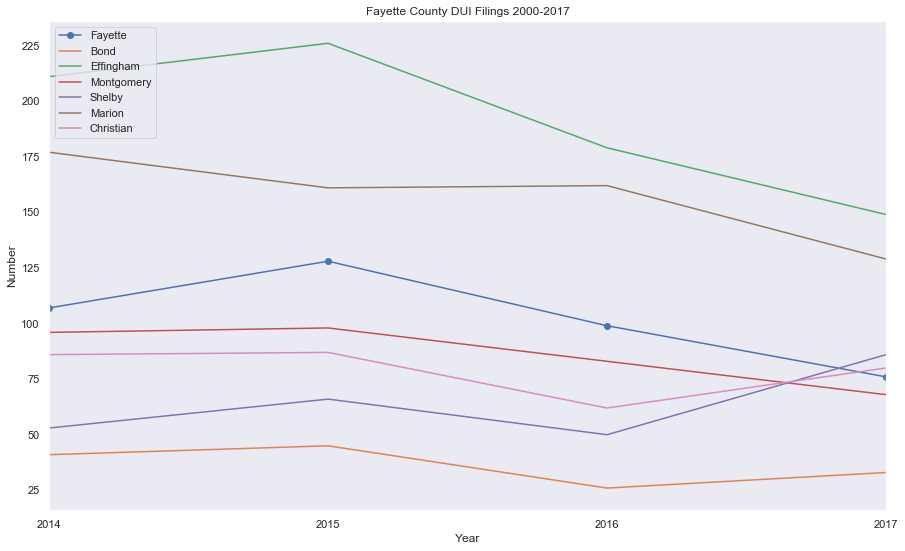

In [94]:
plt.figure(figsize = (15,9))
plt.plot(fayette_recent['year'], fayette_recent['dui'], '-o')
plt.plot(bond['year'], bond['dui'])
plt.plot(eff['year'], eff['dui'])
plt.plot(mont['year'], mont['dui'])
plt.plot(shelby['year'], shelby['dui'])
plt.plot(marion['year'], marion['dui'])
plt.plot(christian['year'], christian['dui'])
plt.legend(['Fayette', 'Bond', 'Effingham', 'Montgomery', 'Shelby', 'Marion', 'Christian'], loc = 'upper left')

plt.title('Fayette County DUI Filings 2000-2017')
plt.xticks(fayette_recent['year'])
plt.xlabel('Year')
plt.xlim(2014,2017)
plt.ylabel('Number')
plt.grid()

plt.show()

Although there is not enough DUI data to make good comparisons, Fayette County is the third highest filer, except for 2017.

Let's take a quick look at filing rates per 100,000 of population for all counties in the judicial district to see how population affects this data.

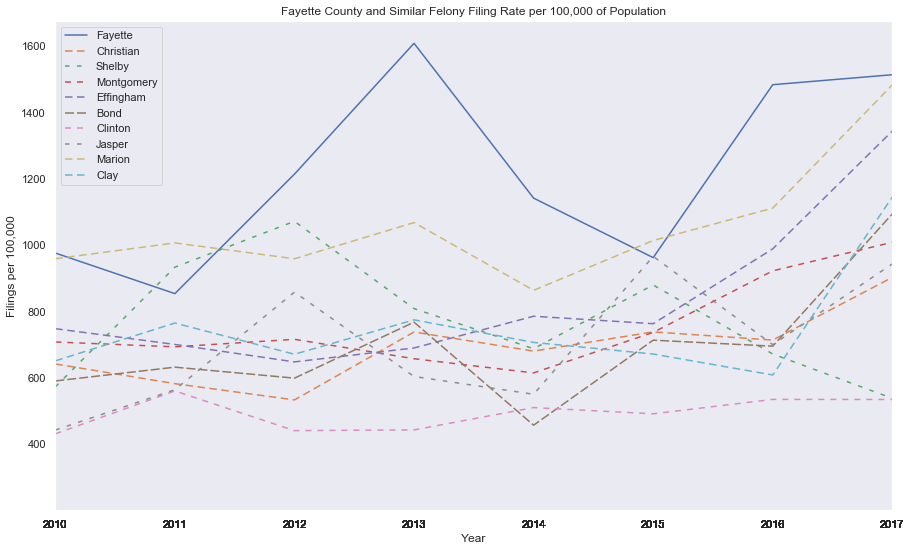

In [95]:
fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(fayette['year'], fayette['felony_rate'])
ax2 = ax.plot(christian['year'], christian['felony_rate'], dashes = [5,3])
ax3 = ax.plot(shelby['year'], shelby['felony_rate'], dashes = [3,5])
ax4 = ax.plot(mont['year'], mont['felony_rate'], dashes = [4,4])
ax5 = ax.plot(eff['year'], eff['felony_rate'], dashes = [5,3])
ax6 = ax.plot(bond['year'], bond['felony_rate'], dashes = [6,2])
ax7 = ax.plot(clinton['year'], clinton['felony_rate'], dashes = [4,4])
ax8 = ax.plot(jasper['year'], jasper['felony_rate'], dashes = [3,5])
ax9 = ax.plot(marion['year'], marion['felony_rate'], dashes = [5,3])
ax10 = ax.plot(clay['year'], clay['felony_rate'], dashes = [5,3])
ax.legend(['Fayette', 'Christian', 'Shelby', 'Montgomery', 'Effingham', 'Bond', 'Clinton', 'Jasper', 'Marion', 'Clay'], loc = 'upper left')
ax.set_title('Fayette County and Similar Felony Filing Rate per 100,000 of Population')
ax.set_xlabel('Year')
ax.set_ylabel('Filings per 100,000')
ax.set_xticks(crime['year'])
ax.set_xlim(2010, 2017)
plt.grid()
plt.show()

fig.savefig('felonyrate.png', bbox_inches='tight')

When population is considered, Fayette County often has more felony filings per 100,000 residents than any other county in the district. Only in 2011 and 2015 was this not the case.

Next, let's look at how these figures compare to some larger counties and the judicial district.

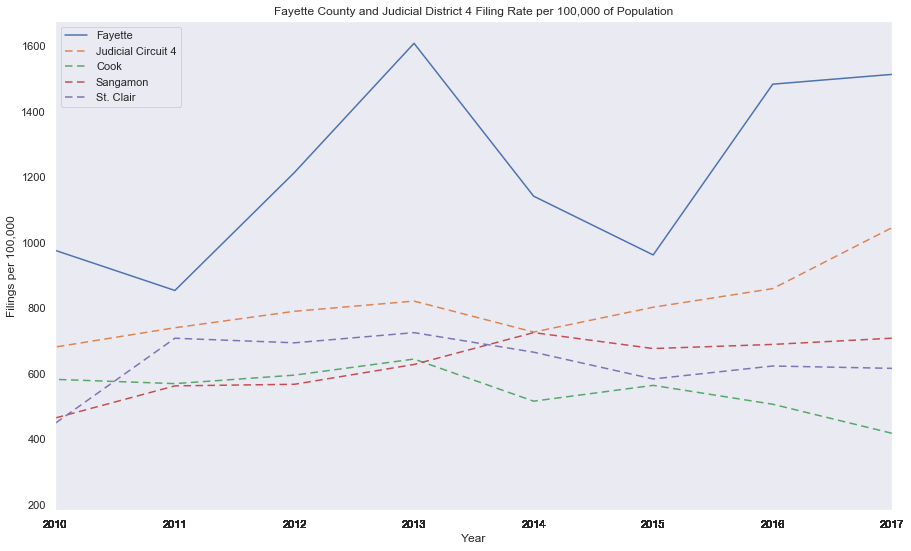

In [96]:
cook = crime.loc[crime['county_name'] == 'Cook']
sangamon = crime.loc[crime['county_name'] == 'Sangamon']
stclair = crime.loc[crime['county_name'] == 'St. Clair']

fig, ax = plt.subplots(figsize=(15,9))

ax1 = ax.plot(fayette['year'], fayette['felony_rate'])
ax2 = ax.plot(jud_4['year'], jud_4['felony_rate'], dashes = [5,3])
ax3 = ax.plot(cook['year'], cook['felony_rate'], dashes = [5,3])
ax4 = ax.plot(sangamon['year'], sangamon['felony_rate'], dashes = [5,3])
ax5 = ax.plot(stclair['year'], stclair['felony_rate'], dashes = [5,3])
ax.legend(['Fayette', 'Judicial Circuit 4', 'Cook', 'Sangamon', 'St. Clair'], loc = 'upper left')
ax.set_title('Fayette County and Judicial District 4 Filing Rate per 100,000 of Population')
ax.set_xlabel('Year')
ax.set_ylabel('Filings per 100,000')
ax.set_xticks(crime['year'])
ax.set_xlim(2010, 2017)
plt.grid()
plt.show()

fig.savefig('felonyratecircuit.png', bbox_inches='tight')

Fayette has a higher filing rate than the Judicial District and Cook, Sangamon, and St. Clair Counties.

What is driving this? This might be another good topic for research.

Finally, let's look at the trend line for felonies and misdemeanors.

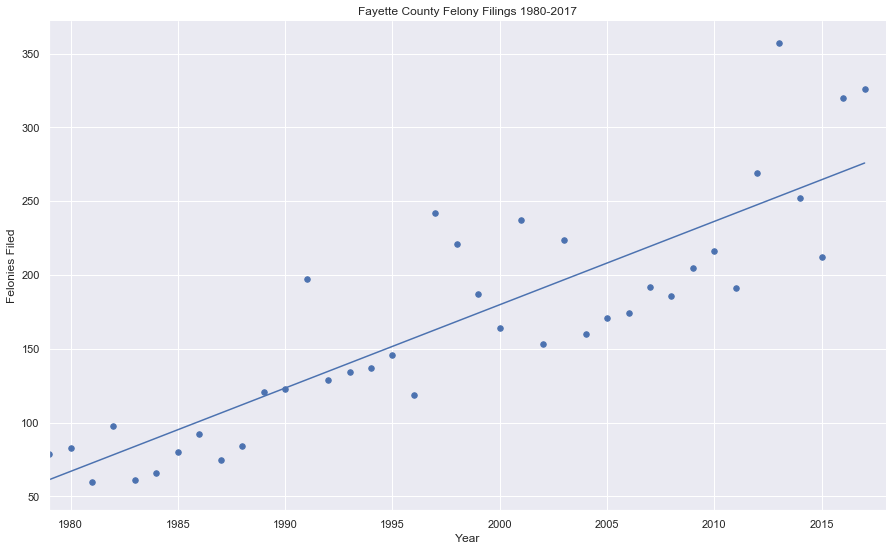

In [98]:
# make the scatter plot
felony = fayette['felony']
year = fayette['year']

fig, ax = plt.subplots(figsize = (15,9))
plt.scatter(year,felony, s=30)

# determine best fit line
plt.plot(np.unique(year), np.poly1d(np.polyfit(year, felony, 1))(np.unique(year)))


plt.xlabel('Year')
plt.ylabel('Felonies Filed')
plt.xlim(1979, 2018)
plt.title('Fayette County Felony Filings 1980-2017')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


fig.savefig('historicalfelony.png')

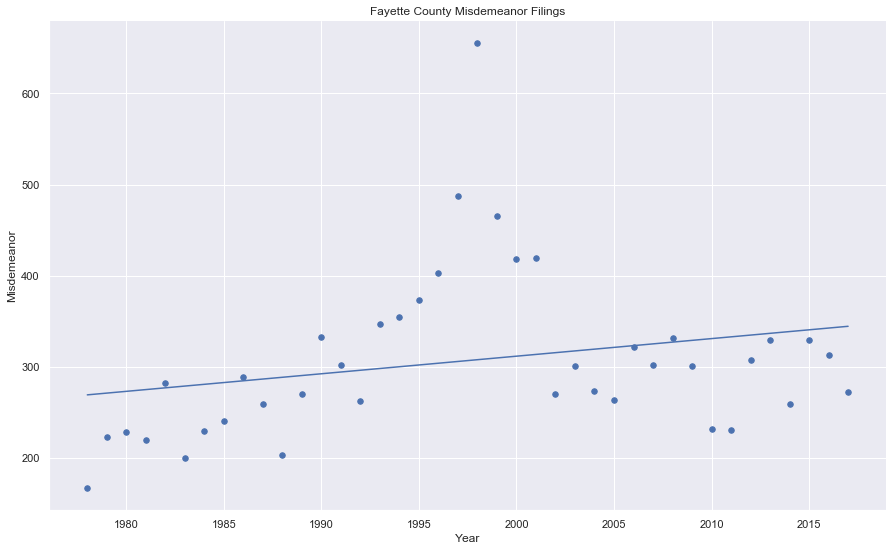

In [99]:
# make the scatter plot
misdemeanor = fayette['misdemeanor']

fig, ax = plt.subplots(figsize = (15,9))
plt.scatter(year, misdemeanor, s=30)

# determine best fit line
plt.plot(np.unique(year), np.poly1d(np.polyfit(year, misdemeanor, 1))(np.unique(year)))

plt.xlabel('Year')
plt.ylabel('Misdemeanor')
plt.title('Fayette County Misdemeanor Filings')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


fig.savefig('historicalmis.png')

We will not use this misdemeanor trend line due to the unidentified increase from about 1995 to 2000. Since we don't know the cause for this increase, we cannot identify whether or not these are outliers and whether or not it is safe to remove them. If it is not, this data does not have a clear linear relationship and treating them as linear may not be appropriate. 